# Final Project Personal Notebook

I am looking at the nutrition metric for determining the best neighborhood in Pittsburgh. The dataset I will be conducting analysis on is the farmer's market data in Allegheny county: https://data.wprdc.org/dataset/allegheny-county-farmers-markets-locations. 


In [3]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First, let's import our raw Farmer's Market data to see what we're working with.

In [4]:
farm_market = pd.read_csv("Farmers-market.csv")
farm_market.head()

,market_id,market_type,market_name,address1,city,state,zip_code,latitude,longitude,phone,phone_ext,county
0,21,Farm Stand,Beccari's Farm Market,5095 Thomas Run Road,Oakdale,PA,15071,40.375388,-80.135377,4.122219e+09,NaN,Allegheny
1,51,Farm Market,Carrick Citiparks Farmers Market,1529 Brownsville Road,Pittsburgh,PA,15210,40.391341,-79.986603,4.124227e+09,NaN,Allegheny
2,90,Farm Market,East Liberty Farmers Market,N Euclid Ave & Broad St,Pittsburgh,PA,15026,40.470769,-79.922862,NaN,NaN,Allegheny
3,92,Farm Stand,Eichner's Farm Market & Greenhouses,285 Richard Road,Wexford,PA,15090,40.608589,-80.061099,7.249352e+09,NaN,Allegheny
4,207,Farm Market,Monroeville FM,2399 Tillbrook Rd,Monroeville,PA,15146,40.418362,-79.763612,7.245389e+09,NaN,Allegheny


Cool! Just from the head of our data, I can see some of these markets aren't in Pittsburgh neighborhoods though. Maybe plotting the points on our Pittsburgh neighborhoods shapefile will help us see how many points we'll need to eliminate.

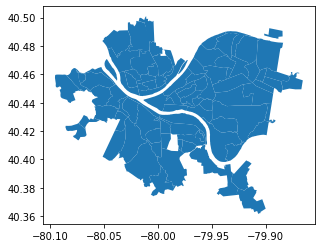

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

Here's the shapefile for our Pittsburgh neighborhoods. Before we plot the farmer's markets, I'm going to make the file a black and white outline so it's easier to read our data on.

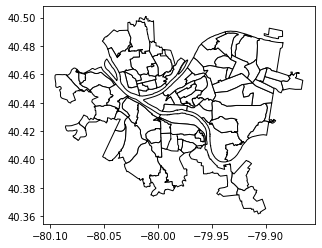

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')
neighborhoods.plot(ax=ax, color="white", edgecolor='black')
plt.show()

Perfect. Now we can plot our points.

Text(0.5, 1.0, "Farmer's Markets in Pittsburgh")

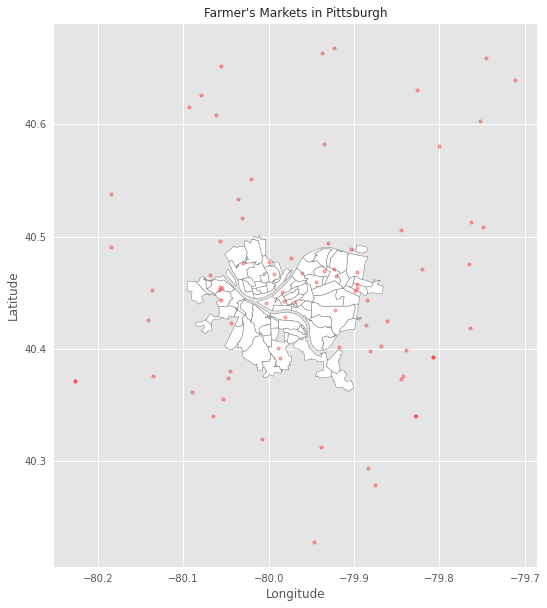

In [7]:
with plt.style.context(("seaborn", "ggplot")):
    neighborhoods.plot(figsize=(12,10),
               color="white",
               edgecolor = "grey");
plt.scatter(farm_market.longitude, farm_market.latitude, s=10, color="red", alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Farmer\'s Markets in Pittsburgh")

Yikes! There's a ton of points outside of our shapefile that we need to eliminate. To cut out most of these, I'm first going to make a query mask based on the coordinates from our shapefile so we can get rid of most of our irrelavent points. 

In [8]:
query_mask = ((farm_market['latitude'] < 40.50) & (farm_market["latitude"] > 40.36) & (farm_market["longitude"] > -80.10) & (farm_market["longitude"] < -79.90))
city_markets = farm_market[query_mask]
city_markets


,market_id,market_type,market_name,address1,city,state,zip_code,latitude,longitude,phone,phone_ext,county
1,51,Farm Market,Carrick Citiparks Farmers Market,1529 Brownsville Road,Pittsburgh,PA,15210,40.391341,-79.986603,4.124227e+09,NaN,Allegheny
2,90,Farm Market,East Liberty Farmers Market,N Euclid Ave & Broad St,Pittsburgh,PA,15026,40.470769,-79.922862,NaN,NaN,Allegheny
9,3688,Farm Stand,Green Grocer/UPMC Matilda Theiss Health Center,373 Burrows St,Pittsburgh,PA,15213,40.442058,-79.970400,NaN,NaN,Allegheny
12,3782,Farm Stand,Green Grocer /Northview Heights,533 Mt Pleasant Rd,Pittsburgh,PA,15214,40.477670,-79.999793,NaN,NaN,Allegheny
16,3683,Farm Stand,Green Grocer/Sharpsburg Community Library,1212 Main Street,Pittsburgh,PA,15215,40.494332,-79.930202,NaN,NaN,Allegheny
17,3684,Farm Stand,Green Grocer/Old Shop n' Save Building,1850 Centre Ave,Pittsburgh,PA,15219,40.442741,-79.981917,NaN,NaN,Allegheny
18,3685,Farm Stand,Green Grocer/Pavillion,Hillsboro St & Sheaden Blvd,Pittsburgh,PA,15204,40.452187,-80.058417,NaN,NaN,Allegheny
22,3636,Farm Stand,Garfield Farm Stand,509 Wicklow Street,Pittsburgh,PA,15224,40.468888,-79.935014,NaN,NaN,Allegheny
24,3666,Farm Market,Lawrenceville Farmers Market,250 40th Street,Lawrenceville,PA,15201,40.467486,-79.960918,4.128027e+09,NaN,Allegheny
27,3479,Farm Stand,Pittsbugh Urban Graden project,1612 Steuben Street,Crafton,PA,15205,40.443894,-80.056270,NaN,NaN,Allegheny


Cool, that narrows it down for sure. If we plot this data and then overlay it on our Pittsburgh shapefile again, I think that'll help us see how many points are still slightly outside the Pittsburgh neighborhoods.

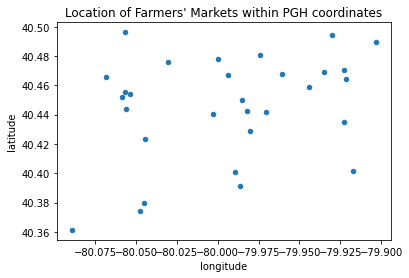

In [9]:
city_markets.plot(kind = "scatter", x = "longitude", y = "latitude", title= "Location of Farmers' Markets within PGH coordinates")

Text(0.5, 1.0, "Farmer's Markets in Pittsburgh")

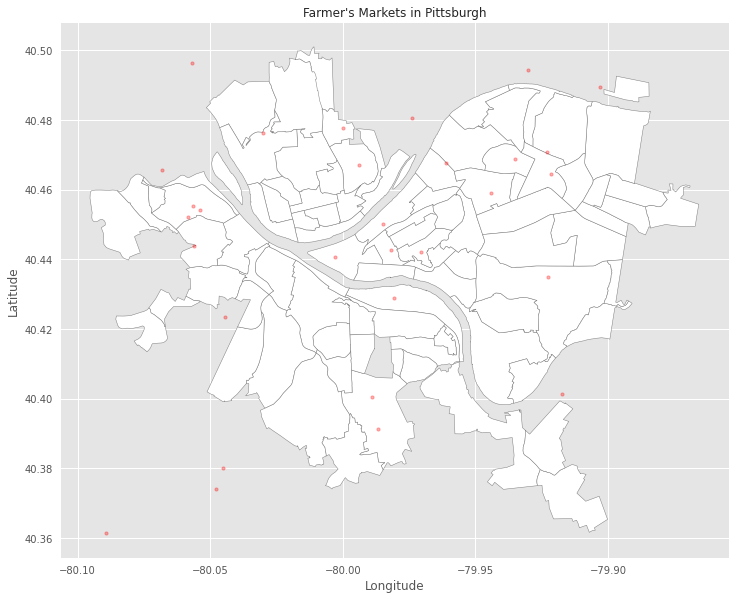

In [10]:
with plt.style.context(("seaborn", "ggplot")):
    neighborhoods.plot(figsize=(12,10),
               color="white",
               edgecolor = "grey");
plt.scatter(city_markets.longitude, city_markets.latitude, s=10, color="red", alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Farmer\'s Markets in Pittsburgh")

Clearly improvement. It looks like we have 10 points that still don't lie within the shapefile, so I'm going to grab the coordinates from the city_markets dataframe and use this website: https://www.gps-coordinates.net/ to check which points are outside this shapefile, as well as get the neighborhoods for our valid points. Then, I'll make a new dataframe of the points that we need and the neighborhood they are in so we can merge it with our original dataframe.

In [48]:
map_markets = pd.DataFrame({"market_name": ["Carrick Citiparks Farmers Market","East Liberty Farmers Market","Green Grocer/UPMC Matilda Theiss Health Center","Green Grocer /Northview Heights", "Green Grocer/Old Shop n' Save Building", "Green Grocer/Pavillion", "Garfield Farm Stand", "Lawrenceville Farmers Market", "Pittsbugh Urban Graden project", "Green Grocer/Sheraden", "Green Grocer","Green Grocer/Three Rivers Manor", "Green Grocer/Sheraden Library", "Green Grocer/Woods Run Library", "Squirrel Hill FM", "Bloomfield Farmers Market", "Farmers Market Cooperative of East Liberty", "Pittsburgh Market Square", "Southside Farmers Market", "Sturges Orchards"] , "Neighborhood": ["Carrick","East Liberty","Terrace Village","Northview Heights", "Crawford-Roberts", "Sheraden", "Garfield", "Lower Lawrenceville", "Crafton", "Sheraden", "Carrick", "Spring Hill-City View", "Sheraden", "Marshall-Shadeland", "Squirrel Hill South", "Bloomfield", "East Liberty", "Central Business District", "Southside Flats", "Strip District"]})
map_markets

,market_name,Neighborhood
0,Carrick Citiparks Farmers Market,Carrick
1,East Liberty Farmers Market,East Liberty
2,Green Grocer/UPMC Matilda Theiss Health Center,Terrace Village
3,Green Grocer /Northview Heights,Northview Heights
4,Green Grocer/Old Shop n' Save Building,Crawford-Roberts
5,Green Grocer/Pavillion,Sheraden
6,Garfield Farm Stand,Garfield
7,Lawrenceville Farmers Market,Lower Lawrenceville
8,Pittsbugh Urban Graden project,Crafton
9,Green Grocer/Sheraden,Sheraden


Neighborhoods located! Time to merge!

In [49]:
merge_with_og = pd.merge(map_markets,farm_market)
merge_with_og.head()

,market_name,Neighborhood,market_id,market_type,address1,city,state,zip_code,latitude,longitude,phone,phone_ext,county
0,Carrick Citiparks Farmers Market,Carrick,51,Farm Market,1529 Brownsville Road,Pittsburgh,PA,15210,40.391341,-79.986603,4.124227e+09,NaN,Allegheny
1,East Liberty Farmers Market,East Liberty,90,Farm Market,N Euclid Ave & Broad St,Pittsburgh,PA,15026,40.470769,-79.922862,NaN,NaN,Allegheny
2,Green Grocer/UPMC Matilda Theiss Health Center,Terrace Village,3688,Farm Stand,373 Burrows St,Pittsburgh,PA,15213,40.442058,-79.970400,NaN,NaN,Allegheny
3,Green Grocer /Northview Heights,Northview Heights,3782,Farm Stand,533 Mt Pleasant Rd,Pittsburgh,PA,15214,40.477670,-79.999793,NaN,NaN,Allegheny
4,Green Grocer/Old Shop n' Save Building,Crawford-Roberts,3684,Farm Stand,1850 Centre Ave,Pittsburgh,PA,15219,40.442741,-79.981917,NaN,NaN,Allegheny


Awesome, now we can plot these points *one more time* and they should all lie within our Pittsburgh neighborhood shapefile.

Text(0.5, 1.0, "Farmer's Markets in Pittsburgh")

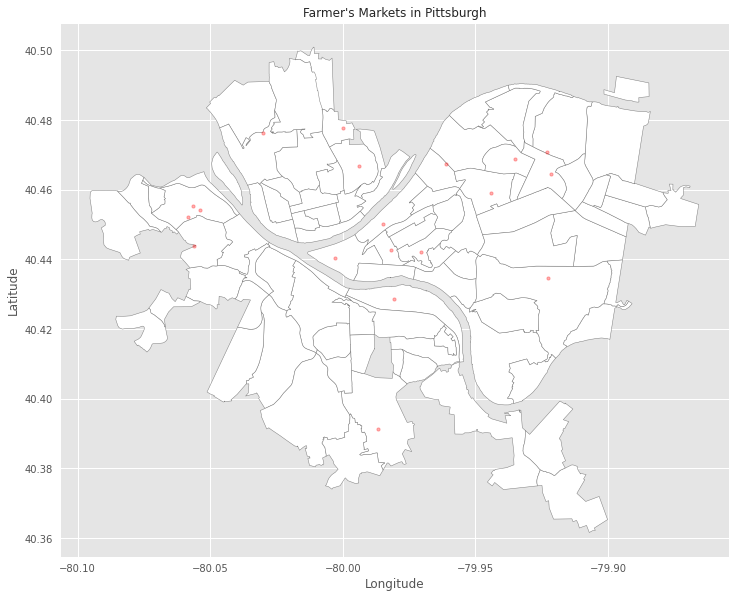

In [50]:
with plt.style.context(("seaborn", "ggplot")):
    neighborhoods.plot(figsize=(12,10),
               color="white",
               edgecolor = "grey");
plt.scatter(merge_with_og.longitude, merge_with_og.latitude, s=10, color="red", alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Farmer\'s Markets in Pittsburgh")

Looks good! Let's see which neighborhoods have the most farmer's markets now.

In [65]:
market_count = map_markets.groupby("Neighborhood").count()
market_count.sort_values("market_name", ascending = False)

,market_name
Neighborhood,
Sheraden,3
Carrick,2
East Liberty,2
Bloomfield,1
Central Business District,1
Crafton,1
Crawford-Roberts,1
Garfield,1
Lower Lawrenceville,1


We have Sheraden on top with 3 farmer's market locations, Carrick and East Liberty tied for second with 2 farmer's markets each, and a massive tie for third place with the rest of our remaining neighborhoods. Let's put this information in a bar chart, for a little data visualization action.

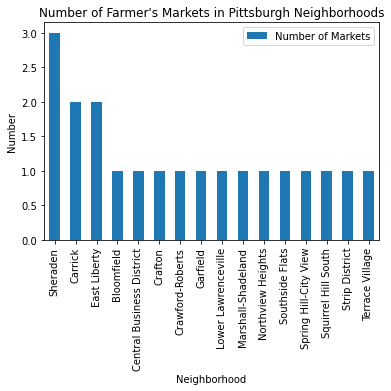

In [69]:
market_count.sort_values("market_name", ascending = False).plot.bar()
plt.title("Number of Farmer\'s Markets in Pittsburgh Neighborhoods")
plt.ylabel("Number")
plt.legend(["Number of Markets"])

Nice. Looks like Pittsburgh has a pretty decent selection of neighborhoods with farmer's markets, but if you're trying to *really* bulk up on organic produce every Saturday morning, Sheraden is the place to be.